# importing necessary libraries

In [142]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

# creating variables for request

In [3]:
url = "https://coinmarketcap.com/"

hdrs = {'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
           'Accept-Language':'en-US,en;q=0.9'}

# sending request to url with custom headers

In [190]:
url_response = requests.get(url, hdrs)

# checking response from url

In [191]:
url_response.ok

True

# Making soup

In [192]:
url_soup = BeautifulSoup(url_response.content,"lxml")

In [193]:
print(url_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script crossorigin="anonymous">
   (function(c,u,v,n,p,e,z,A,w){function k(a){if(!x){x=!0;var l=u.getElementsByTagName(v)[0],d=u.createElement(v);d.src=A;d.crossOrigin="anonymous";d.addEventListener("load",function(){try{c[n]=r;c[p]=t;var b=c[e],d=b.init;b.init=function(a){for(var b in a)Object.prototype.hasOwnProperty.call(a,b)&&(w[b]=a[b]);d(w)};B(a,b)}catch(g){console.error(g)}});l.parentNode.insertBefore(d,l)}}function B(a,l){try{for(var d=m.data,b=0;b<a.length;b++)if("function"===typeof a[b])a[b]();var e=!1,g=c.__SENTRY__;"undefined"!==
typeof g&&g.hub&&g.hub.getClient()&&(e=!0);g=!1;for(b=0;b<d.length;b++)if(d[b].f){g=!0;var f=d[b];!1===e&&"init"!==f.f&&l.init();e=!0;l[f.f].apply(l,f.a)}!1===e&&!1===g&&l.init();var h=c[n],k=c[p];for(b=0;b<d.length;b++)d[b].e&&h?h.apply(c,d[b].e):d[b].p&&k&&k.apply(c,[d[b].p])}catch(C){console.error(C)}}for(var f=!0,y=!1,q=0;q<document.scripts.length;q++)if(-1<document.scripts[q].src.indexOf(z)){f="no"!=

# getting tables from website

In [194]:
tables = url_soup.find_all("table")

In [230]:
len(tables)

1

# getting all tr tags along with td tags of them

In [195]:
all_rows_with_tags = {}
all_tr_tags = []

In [196]:
for table in tables:
    tr_tags = table.find_all("tr")
    
    for i, tr in enumerate(tr_tags):
        all_td_tags = []
        td_tags = tr.find_all("td")
        all_tr_tags.append(tr)
        
        
        for td in td_tags:
            all_td_tags.append(td)
            
        if i>0:
            all_rows_with_tags[i]=all_td_tags

# getting data of only top 10 crypto currencies

In [197]:
top_10_crypto_data = []

In [198]:
for i in range(1,11):
#     print(len(all_rows_with_tags[i]))
    crypt_data = []
    for td in all_rows_with_tags[i]:
        td_data = td.text.strip()
        if td_data !="":
            crypt_data.append(td_data)
    top_10_crypto_data.append(crypt_data)
#         print(td.text)


In [199]:
crypto_names_prices = {}

In [200]:
top_10_crypto_names = []
top_10_crypto_price = []

In [212]:
for i in top_10_crypto_data:
#     print(i)
    for j in range(1,3):
        if j==1:
            top_10_crypto_names.append(i[j])
        else:
            top_10_crypto_price.append(i[j])
        print(i[j],end=" ")
        
    print()

Bitcoin1BTCBuy $38,775.34 
Ethereum2ETHBuy $2,555.60 
Tether3USDT $1.00 
BNB4BNBBuy $370.90 
USD Coin5USDC $0.9999 
XRP6XRP $0.7869 
Terra7LUNABuy $88.96 
Cardano8ADA $0.8017 
Solana9SOLBuy $79.94 
Avalanche10AVAXBuy $69.99 


In [136]:
top_10_crypto_names

['Bitcoin1BTCBuy',
 'Ethereum2ETHBuy',
 'Tether3USDT',
 'BNB4BNBBuy',
 'USD Coin5USDC',
 'XRP6XRP',
 'Terra7LUNABuy',
 'Cardano8ADA',
 'Solana9SOLBuy',
 'Avalanche10AVAXBuy']

In [219]:
formatted_top_10_crypto_names = []

In [220]:
# Formatting names
for i,name in enumerate(top_10_crypto_names,1):
    split_name = name.split(f"{i}")
    formatted_top_10_crypto_names.append(split_name[0])

In [221]:
formatted_top_10_crypto_names

['Bitcoin',
 'Ethereum',
 'Tether',
 'BNB',
 'USD Coin',
 'XRP',
 'Terra',
 'Cardano',
 'Solana',
 'Avalanche']

In [222]:
numeric_top_10_crypto_price = []

In [223]:
# Formatting price values
for price in top_10_crypto_price:
    price1 = price.split("$")
    for t in price1:
        if t!="":
            t1 = t.split(",")
            numeric_top_10_crypto_price.append(float("".join(t1)))

In [224]:
numeric_top_10_crypto_price

[38775.34, 2555.6, 1.0, 370.9, 0.9999, 0.7869, 88.96, 0.8017, 79.94, 69.99]

In [225]:
crypto_names_prices['name'] = formatted_top_10_crypto_names
crypto_names_prices["price"] = numeric_top_10_crypto_price

In [226]:
crypto_names_prices

{'name': ['Bitcoin',
  'Ethereum',
  'Tether',
  'BNB',
  'USD Coin',
  'XRP',
  'Terra',
  'Cardano',
  'Solana',
  'Avalanche'],
 'price': [38775.34,
  2555.6,
  1.0,
  370.9,
  0.9999,
  0.7869,
  88.96,
  0.8017,
  79.94,
  69.99]}

# creating dataframe of data

In [227]:
top10 = pd.DataFrame(crypto_names_prices)

In [228]:
top10

,name,price
0,Bitcoin,38775.3400
1,Ethereum,2555.6000
2,Tether,1.0000
3,BNB,370.9000
4,USD Coin,0.9999
5,XRP,0.7869
6,Terra,88.9600
7,Cardano,0.8017
8,Solana,79.9400
9,Avalanche,69.9900


# showing data using bar chart

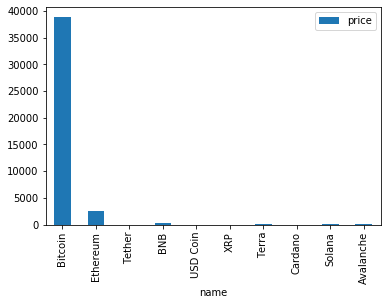

In [229]:
top10.plot.bar(x='name',y='price')